In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season

In [2]:
nba_players = pd.read_csv("2023_nba_player_stats.csv")

The first step to do this Exploratory Data Analysis is to load the data and do a little bit of cleaning in it.<br>
With that we'll also answer some questions already.

**1-** How many players are there in the dataset?

In [3]:
nba_players.shape

(539, 30)

**2-** What informations do we have for each player?

In [4]:
nba_players.columns

Index(['PName', 'POS', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-'],
      dtype='object')

Knowing the atributes of the dataset we can add few more columns to help us further with the 2P proportions.

In [5]:
nba_players['2PA'] = nba_players['FGA'] - nba_players['3PA']
nba_players['2PM'] = nba_players['FGM'] - nba_players['3PM']

nba_players['2P%'] = nba_players['2PM']/nba_players['2PA']

In [6]:
nba_players.columns

Index(['PName', 'POS', 'Team', 'Age', 'GP', 'W', 'L', 'Min', 'PTS', 'FGM',
       'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP', 'DD2', 'TD3', '+/-',
       '2PA', '2PM', '2P%'],
      dtype='object')

In [7]:
nba_players.head()

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,STL,BLK,PF,FP,DD2,TD3,+/-,2PA,2PM,2P%
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,78,51,160,3691,31,1,470,873,487,0.557847
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,66,112,205,3706,39,1,424,1128,662,0.586879
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,90,33,166,3747,36,10,128,908,534,0.588106
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,112,65,192,3425,3,0,149,1213,646,0.532564
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,52,51,197,3451,46,6,341,1107,660,0.596206


**3-** How many players are there in the dataset for each position?

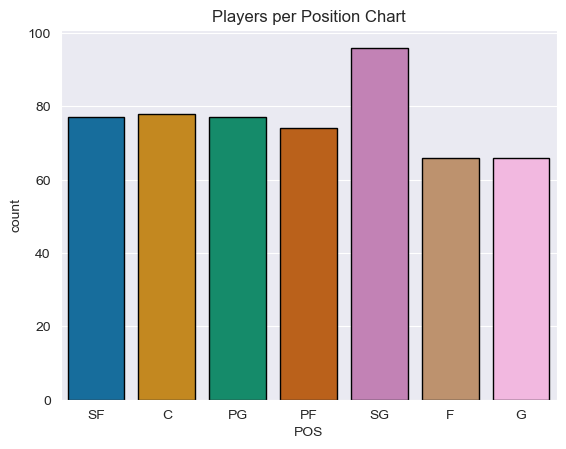

In [8]:
sns.set_style("darkgrid")

count = nba_players['POS'].value_counts()
plt.title("Players per Position Chart")
sns.countplot(data = nba_players, x = 'POS', edgecolor = 'black', palette="colorblind")
plt.show()

In [9]:
print(count)

SG    96
C     78
SF    77
PG    77
PF    74
F     66
G     66
Name: POS, dtype: int64


If we compare the sum of players per position and the shape of the dataframe, we can see that there are players in the dataset that don't have  an associated position to them. Now, we can make a choice between few approaches to this problem: <br> 1- The first one is to give to each of these players the position with more occurrences in the dataset; or <br> 2- We could simply remove these observations from the dataset <br> <br> I decided that in this case I'll follow the second approach 

In [10]:
nba_players_no_null = nba_players.dropna(subset=['POS'])

In [11]:
nba_players_no_null.shape

(534, 33)

For this EDA my goal is to study how different positions differ or are similar from each other. <br>
To start this study I'll begin plotting an age distribution per position. The objective here is to gain a little more information of the demographic profile of each role in a NBA court.<br> **4-** How the position differ in age?

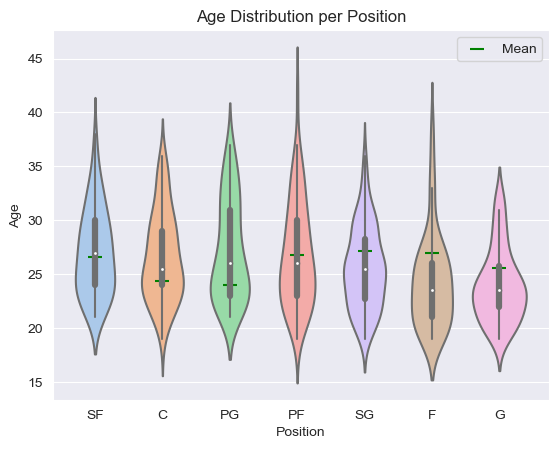

In [12]:
#need to improve these chart


player_age_distribution = nba_players_no_null.groupby('POS')['Age']

colors = sns.color_palette('colorblind')

ax = sns.violinplot(data = nba_players_no_null, x='POS', y='Age', palette= 'pastel')

means = nba_players_no_null.groupby('POS')['Age'].mean()

positions = range(len(means))
ax.scatter(positions, means, color='green', label='Mean', marker="_", s=100)

plt.title('Age Distribution per Position')
plt.xlabel('Position')
plt.ylabel('Age')
plt.legend()
plt.show()

After that we can also calculate the proportion of time that a player of each position stayed on the court.<br>
**5-** Which role spend more time in the court?

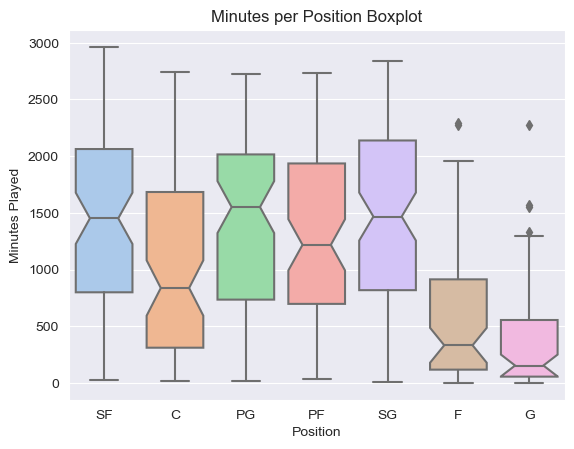

In [13]:
sns.boxplot(data = nba_players_no_null, x = 'POS', y = 'Min', palette = 'pastel', notch = True)
plt.xlabel('Position')
plt.ylabel('Minutes Played')
plt.title('Minutes per Position Boxplot')
plt.show()

We can see by the boxplot that usually, if we consider only the top 25% of each position, the players that spend most time in the court are the shooting guards, but when we look at the median (top 50%), we can see that things change, and the point guards appear at the top.

In [14]:
medians = nba_players_no_null.groupby('POS')['Min'].median()
print(medians)

POS
C      838.55
F      333.85
G      155.55
PF    1219.10
PG    1551.80
SF    1452.60
SG    1468.25
Name: Min, dtype: float64


But if we look at the mean for players on each role we can see that, again, the shooting guards lead the number of minutes played. <br><br>The main conclusion that we can reach with those metrics is that, usually coaches tend to rely more on players of their backcourt, at least when it comes to play more minutes.

In [15]:
means = nba_players_no_null.groupby('POS')['Min'].mean()
print(means)

POS
C     1017.233333
F      594.909091
G      395.472727
PF    1319.018919
PG    1407.524675
SF    1395.584416
SG    1423.453125
Name: Min, dtype: float64


Now, the question we can make is:<br>
**6-** Which role has the most prolific scorers?<br><br>
and also we can answer the question of<br>
**7-** How each position tend to score? 

To start, we'll try to answer 6 first, and for that, we can again use a boxplot to see the quartiles of pontuation of each role in the dataset.

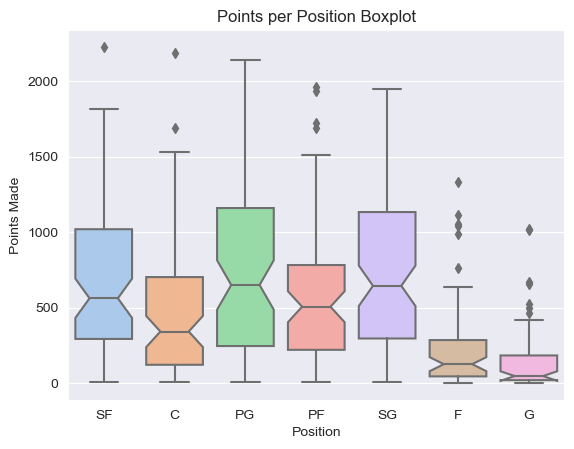

In [16]:
sns.boxplot(data = nba_players_no_null, x='POS', y='PTS', palette='pastel', notch=True)
plt.xlabel('Position')
plt.ylabel('Points Made')
plt.title('Points per Position Boxplot')
plt.show()

We can see in the chart, that the positions who reach the higher number of points are, again, the PG and SG, and this happens with every quartile on the plot. The 25% worst scorers on the 1 and 2 in the league score better than the 25% worst scorers in every single other role. One possibility of this event is that most of the nba's teams has at least one of their two biggest offensive threats on the backcourt, we could see if this hypotesis is true by selecting the two best scorers of each team, and them counting the occurrences of each position.

In [17]:
best_scorers_team = nba_players_no_null.groupby('Team').apply(lambda group: group.nlargest(2, 'PTS')).reset_index(drop=True)

scorers_pos = best_scorers_team['POS'].value_counts()

print(scorers_pos)

SG    18
PG    17
SF    10
PF    10
C      4
F      1
Name: POS, dtype: int64


With the count we can see that our hypotesis is true, in fact, the two positions who has the higher number of top scorers in every team are PG and SG.<br><br>

Now we can try to describe how each role make their points, is that shooting beyond the arc? Or does the players try to get a little bit closer to the rim to score? Or do they relly on their free throw shooting?

First thing we can give a look is to the field goal of every role without any diferentiation beetween the types of shots. Our goal is just to see if there is a position that is more eficcient while scoring. First we can give a look at the FG%.

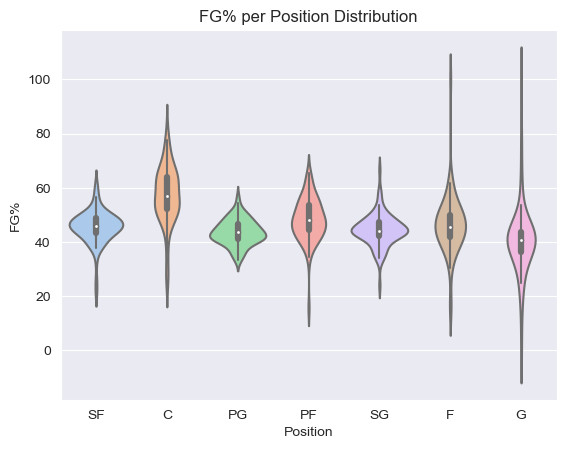

In [18]:
sns.violinplot(data=nba_players_no_null, x='POS', y='FG%', palette='pastel', notch = True)
plt.xlabel('Position')
plt.ylabel('FG%')
plt.title('FG% per Position Distribution')
plt.show()

We can see that the distribution of FG% is more concentrated arround 50% for almost all positions, the only two exceptions are the Centers and Power Forwards. For that I have 2 hypotesis, not necessarily excludent beetween then.<br>
#### Hypotesis 1 - 
This happens because usually Cs and PFs have less atempts to score than other roles, therefore, is common for players in this positions to have higher percentages. We can check this theory by comparing the median number of atempts for each role. <br>
#### Hypotesis 2 - 
I also think that players on this positions usually have higher percentages atempts, closer to the rim. We can also check that by checking the proportion beetween the types of shot atempts that a player can make.

##### Hypotesis 1-
First we'll see if hypotesis 1 holds.

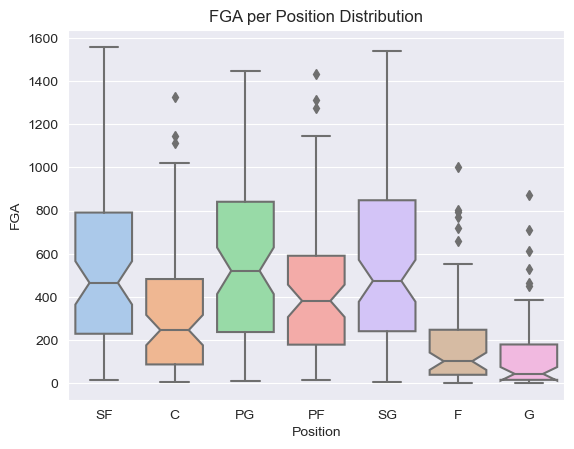

In [19]:
sns.boxplot(data=nba_players_no_null, x='POS', y='FGA', palette='pastel', notch = True)
plt.xlabel('Position')
plt.ylabel('FGA')
plt.title('FGA per Position Distribution')
plt.show()

And for comparisson we can also see the mean of the number of atempts.

In [20]:
means = nba_players_no_null.groupby('POS')['FGA'].mean()
print(means)

POS
C     328.192308
F     196.363636
G     133.000000
PF    444.459459
PG    577.558442
SF    506.415584
SG    557.479167
Name: FGA, dtype: float64


Both metrics tell us that the hypotesis 1 is true, in average, PFs and Cs usually shoot less than other roles.<br>
And also, 50% of Cs and PFs shoot less than 50% of players in any of the other positions. And that is also true for each of every quartile on the data. Therefore, any succesfull atempt of scoring has a greater weight in FG%.

##### Hypotesis 2 -
Now we'll check hypotesis 2.<br><br>
The first step is to calculate the proportion of 2PA and 3PA and the total atempts.

In [21]:
subset = nba_players_no_null[['2PA', '3PA', 'FGA']].copy()
'''
subset = nba_players_no_null[['2PA', '3PA', 'FGA', 'POS']].copy()

subset['2PA proportion'] = subset.groupby('POS')['2PA'].transform('cumsum') / subset.groupby('POS')['FGA'].transform('cumsum')
subset['3PA proportion'] = subset.groupby('POS')['3PA'].transform('cumsum') / subset.groupby('POS')['FGA'].transform('cumsum')
'''

subset['2PA proportion'] = subset['2PA'] / subset['FGA']
subset['3PA proportion'] = subset['3PA'] / subset['FGA']
subset['POS'] = nba_players_no_null['POS']

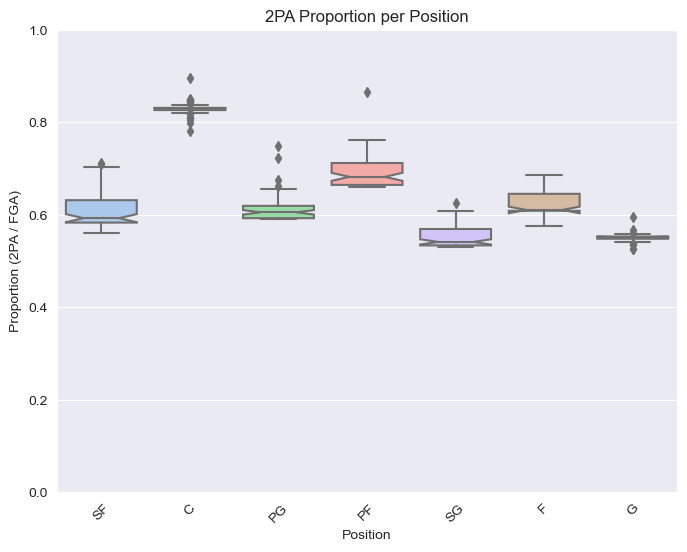

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset, x='POS', y='2PA proportion', palette='pastel', notch = True)
plt.title('2PA Proportion per Position')
plt.xlabel('Position')
plt.ylabel('Proportion (2PA / FGA)')
plt.xticks(rotation=45)
plt.ylim([0,1])
plt.show()

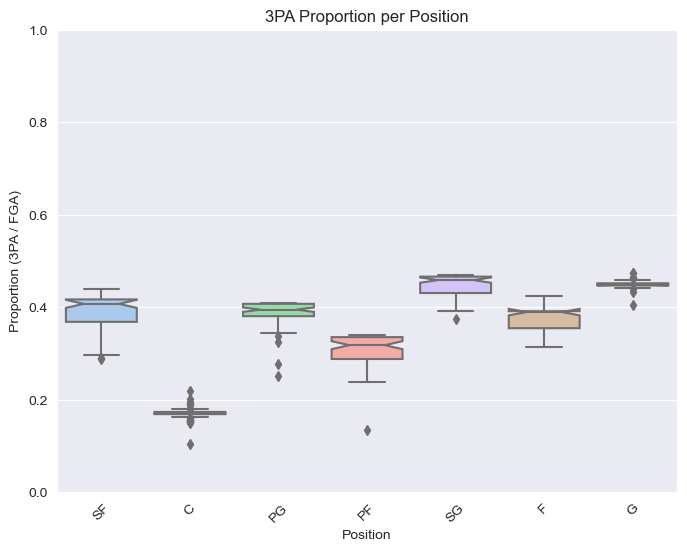

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset, x='POS', y='3PA proportion', palette='pastel', notch = True)
plt.title('3PA Proportion per Position')
plt.xlabel('Position')
plt.ylabel('Proportion (3PA / FGA)')
plt.ylim([0,1])
plt.xticks(rotation=45)
plt.show()

Do the analysis of these boxplots.